             OBJECTIVE

    To build a machine learning model that can predict the likelihood of a person having a heart disease based on the given features.

### Import the necessary libraries

In [1]:


# For data Analysis
import pandas as pd
import numpy as np

# For Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For Data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries-(The machine learning algorithms)
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# For any error occured in importing the above libraries, pip install the below:
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrices
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

!pip install --upgrade scikit-learn

# To ignore/disable warnings
import warnings
warnings.filterwarnings("ignore")

### Load Dataset

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Dictionary
 
1) age: age in years
2) sex: sex
        1 = male
        0 = female
        
2) cp: chest pain type
        Value 0: typical angina
        Value 1: atypical angina
        Value 2: non-anginal pain
        Value 3: asymptomatic
        
4) trestbps: resting blood pressure (in mm Hg on admission to the hospital)

5) chol: serum cholestoral in mg/dl

6) fbs: (fasting blood sugar > 120 mg/dl)
        1 = true;
        0 = false
7) restecg: resting electrocardiographic results
        Value 0: normal
        Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
        
8) thalach: maximum heart rate achieved

9) exang: exercise induced angina
        1 = yes
        0 = no
10) oldpeak = ST depression induced by exercise relative to rest 

11) slope: the slope of the peak exercise ST segment
        Value 0: upsloping
        Value 1: flat
        Value 2: downsloping
12) ca: number of major vessels (0-3) colored by flourosopy

13) thal:
        0 = error (in the original dataset 0 maps to NaN's)
        1 = fixed defect
        2 = normal
        3 = reversable defect
        
14) target (the lable):
        0 = no disease,
        1 = disease
        
Note on the target label:

Diagnosis of heart disease (angiographic disease status)
Value 0: < 50% diameter narrowing
Value 1: > 50% diameter narrowing


### For a better understanding and flow of analysis, we will rename some of the columns.

In [3]:
df.columns = ['age', 'sex', 'Chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'Fasting_blood_sugar', 'restecg', 'max_heart_rate_achieved',
       'exercise_induced_angina ', 'st_depression', 'st_slope', 'num_of_major_vessels', 'thalassemai', 'target']
      
df.head()


,age,sex,Chest_pain_type,resting_blood_pressure,cholesterol,Fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_of_major_vessels,thalassemai,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data verification - to know the data type, number of columns and rows, missing data, etc

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       303 non-null    int64  
 1   sex                       303 non-null    int64  
 2   Chest_pain_type           303 non-null    int64  
 3   resting_blood_pressure    303 non-null    int64  
 4   cholesterol               303 non-null    int64  
 5   Fasting_blood_sugar       303 non-null    int64  
 6   restecg                   303 non-null    int64  
 7   max_heart_rate_achieved   303 non-null    int64  
 8   exercise_induced_angina   303 non-null    int64  
 9   st_depression             303 non-null    float64
 10  st_slope                  303 non-null    int64  
 11  num_of_major_vessels      303 non-null    int64  
 12  thalassemai               303 non-null    int64  
 13  target                    303 non-null    int64  
dtypes: float64

#### Perform statistical Analysis of the data - ( To know the mean, median, max and min values..etc)

In [5]:
df.describe()

,age,sex,Chest_pain_type,resting_blood_pressure,cholesterol,Fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_of_major_vessels,thalassemai,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Checking for missing values

age                         0
sex                         0
Chest_pain_type             0
resting_blood_pressure      0
cholesterol                 0
Fasting_blood_sugar         0
restecg                     0
max_heart_rate_achieved     0
exercise_induced_angina     0
st_depression               0
st_slope                    0
num_of_major_vessels        0
thalassemai                 0
target                      0
dtype: int64


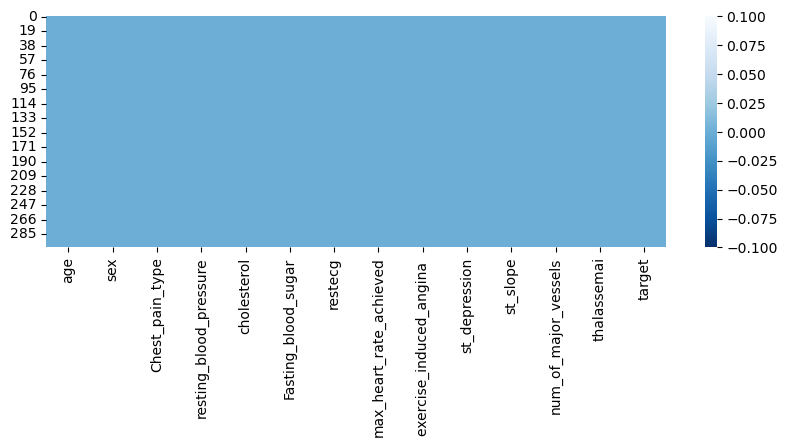

In [6]:
print(df.isnull().sum())

#visualizing the missing data
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar=True, cmap="Blues_r");

#### From the result above, we observed there are no missing values

In [7]:
df.isna().sum()

age                         0
sex                         0
Chest_pain_type             0
resting_blood_pressure      0
cholesterol                 0
Fasting_blood_sugar         0
restecg                     0
max_heart_rate_achieved     0
exercise_induced_angina     0
st_depression               0
st_slope                    0
num_of_major_vessels        0
thalassemai                 0
target                      0
dtype: int64

In [8]:
# Remove extra spaces from column names

df.columns = [col.strip() for col in df.columns]

# Remove extra spaces from all cells in the DataFrame

df.replace('\s+', ' ', regex=True, inplace=True)

### Check for outliers on individual columns


In [9]:
df.columns

Index(['age', 'sex', 'Chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'Fasting_blood_sugar', 'restecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_of_major_vessels', 'thalassemai', 'target'],
      dtype='object')

In [10]:
df['thalassemai'].value_counts()

thalassemai
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [11]:
def Shorten_categories(categories):
    categorical_grp = {}
    for i in range (len(categories)):
        if categories.values[i] >= 50:
            categorical_grp[categories.index[i]] = categories.index[i]
        else:
            categorical_grp[categories.index[i]] = 1
    return categorical_grp

In [12]:
Thal_grp = Shorten_categories(df.thalassemai.value_counts())
df['thalassemai'] = df['thalassemai'].map(Thal_grp)

In [13]:
df['thalassemai'].value_counts()

thalassemai
2    166
3    117
1     20
Name: count, dtype: int64

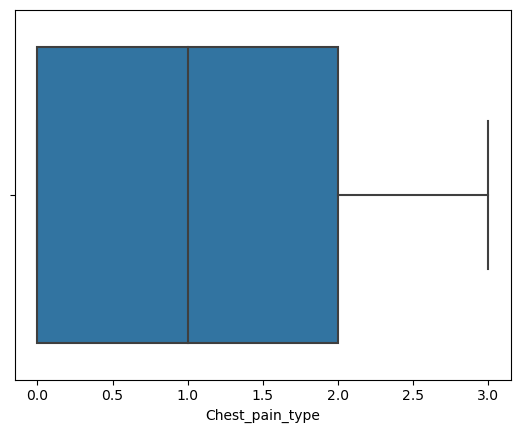

In [14]:
sns.boxplot(x=df['Chest_pain_type']);

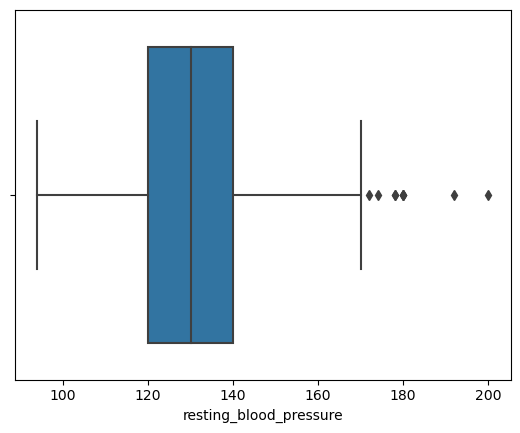

In [15]:
sns.boxplot(x=df['resting_blood_pressure']);

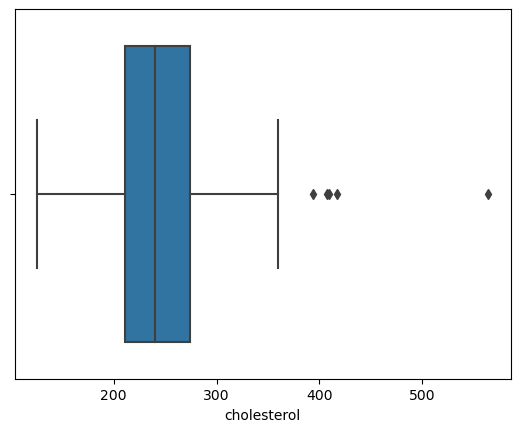

In [16]:
sns.boxplot(x=df['cholesterol']);

### The few plots above shows we have outliers in our data



### Dealing with the features with OUTLIERS

#### -handling the outliers through NORMALIZATION (scaling the values to be between 0 and 1)

#### - After normalizing ( Applying the scaler to columns with outliers), we drop the original columns, moving foward with the new scaled columns

#### Make a copy of the DataFrame ( to use the int form for correlation)

In [17]:
#df1 = df.copy()

### Exploratory Data Analysis

#### Univariate Analysis

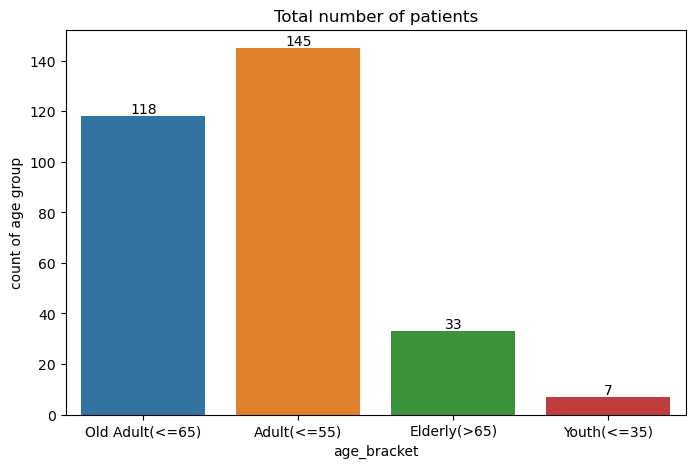

In [18]:
# Data Visualization for age bracket

def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <= 55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly(>65)"
    
df["age_bracket"] = df["age"].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize =(8,5))
ax = sns.countplot(x = "age_bracket", data=df)
plt.xlabel("age_bracket")
plt.ylabel("count of age group")
plt.title("Total number of patients")
ax.bar_label(container=ax.containers[0], label="Count of age group");   

#### Majority of the patients are between 36 to 64 years old

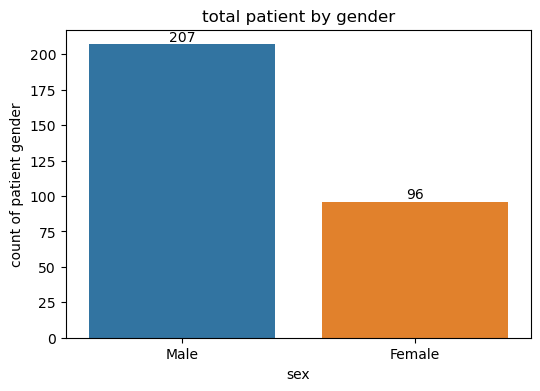

In [19]:
# DATA VISUALIZATION FOR SEX

def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
    
df["sex"] = df["sex"].apply(gender)

# Investigating the gender patients
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "sex", data=df)
plt.xlabel("sex")
plt.ylabel("count of patient gender")
plt.title("total patient by gender")
ax.bar_label(container=ax.containers[0], label="count of patient gender");

#### We have more male patients than Female.

In [20]:
df.columns

Index(['age', 'sex', 'Chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'Fasting_blood_sugar', 'restecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_of_major_vessels', 'thalassemai', 'target',
       'age_bracket'],
      dtype='object')

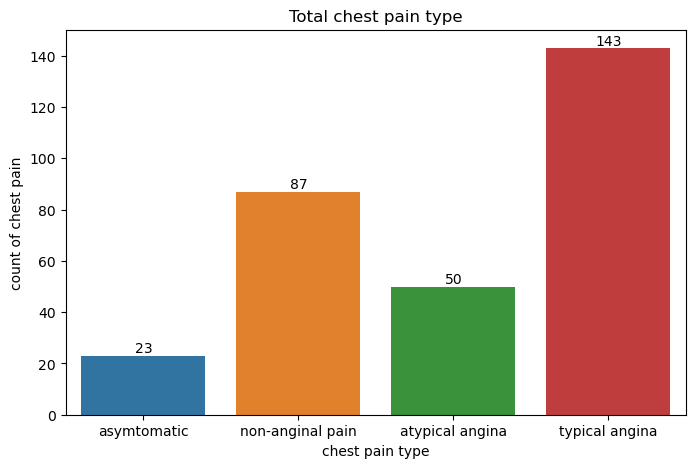

In [21]:
# DATA VISUALIZATION OF CHEST PAIN

# Chest pain type (1: typical angina, 2: atypical angina, 3: non-aginal pain, 4: asymtomatic)

def chest_pain(cp):
    if cp == 0:
       return "typical angina"        
    elif cp == 1:
        return "atypical angina"
               
    elif cp ==2:
        return "non-anginal pain"
    else:
        return "asymtomatic"

df["Chest_pain_type"] = df["Chest_pain_type"].apply(chest_pain)


plt.figure(figsize=(8,5))
ax = sns.countplot(x="Chest_pain_type", data=df)
plt.xlabel("chest pain type")
plt.ylabel("count of chest pain")
plt.title("Total chest pain type")
ax.bar_label(container=ax.containers[0], label="count of chest pain type");

               

### Most of the patients have typical angina chest pain,

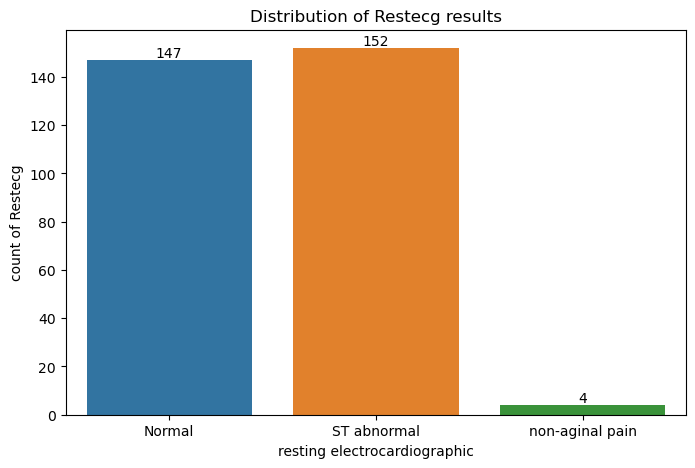

In [22]:
# DATA VISUALIZATION OF resting electrocardiographic (Restecg)

# Chest pain type (0: Normal , 1: ST abnormal, 2: Left Ventricular)

def Reste_cg(rg):
    if rg == 0:
       return "Normal"        
    elif rg == 1:
        return "ST abnormal"
               
    elif rg ==2:
        return "non-aginal pain"
    else:
        return "Left Ventricular"

df["restecg"] = df["restecg"].apply(Reste_cg)


plt.figure(figsize=(8,5))
ax = sns.countplot(x="restecg", data=df)
plt.xlabel("resting electrocardiographic")
plt.ylabel("count of Restecg")
plt.title("Distribution of Restecg results")
ax.bar_label(container=ax.containers[0], label="count of restecg");


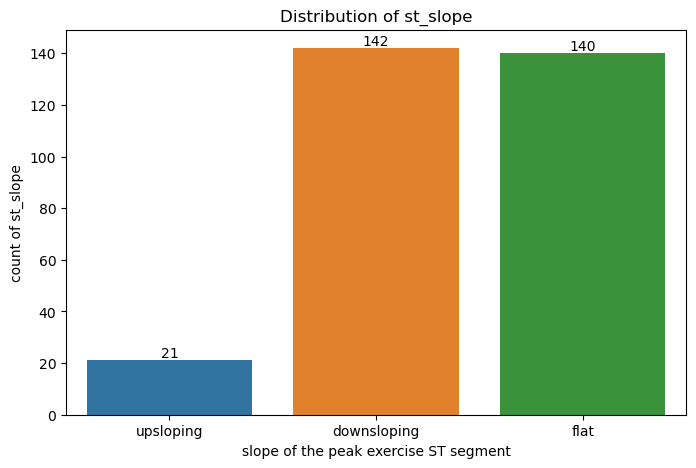

In [23]:
# DATA VISUALIZATION OF the slope of the peak exercise ST segment

# Slope (0: upsloping , 1: Flat, 2: downsloping)

def Slope(st):
    if st == 0:
        return "upsloping"        
    elif st == 1:
        return "flat"
    else:
        return "downsloping"

df["st_slope"] = df["st_slope"].apply(Slope)


plt.figure(figsize=(8,5))
ax = sns.countplot(x="st_slope", data=df)
plt.xlabel("slope of the peak exercise ST segment")
plt.ylabel("count of st_slope")
plt.title("Distribution of st_slope")
ax.bar_label(container=ax.containers[0], label="count of st_slope");


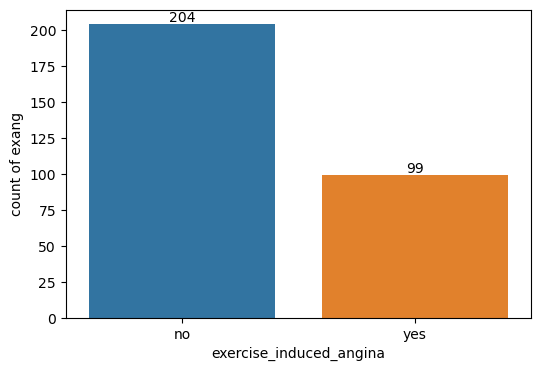

In [24]:
# DATA VISUALIZATION OF exercise_induced_angina

def exang(eg):
    if eg== 1: 
        return "yes"
    else:
        return "no"
df['exercise_induced_angina'] = df['exercise_induced_angina'].apply(exang)

plt.figure(figsize=(6,4))
ax = sns.countplot(x='exercise_induced_angina', data=df)
plt.xlabel('exercise_induced_angina')
plt.ylabel('count of exang')
ax.bar_label(container=ax.containers[0], label='count of exang');


### Next visualization is the TARGET column.

#### To find out if we have more patients with heart diseases or not.

In [25]:
df.columns

Index(['age', 'sex', 'Chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'Fasting_blood_sugar', 'restecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_of_major_vessels', 'thalassemai', 'target',
       'age_bracket'],
      dtype='object')

target
yes    165
no     138
Name: count, dtype: int64


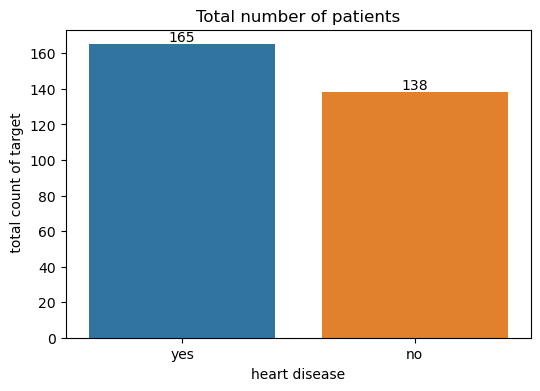

In [26]:
def heart_disease(target):
     if target ==1:
        return "yes"
     else:
        return "no"
    
df["target"] = df["target"].apply(heart_disease)

plt.figure(figsize=(6,4))
ax = sns.countplot(x = "target", data=df)
plt.xlabel("heart disease")
plt.ylabel(" total count of target")
ax.bar_label(container=ax.containers[0], label=  "total count of target");
plt.title ("Total number of patients")

#To print total patient in each category seperately

print(df["target"].value_counts())


    

### BIVARIATE ANALYSIS


#### To visualize the AGE GROUP that has the most HEART DISEASE and those that don't
#### (Comparing the Age group column with the target column)


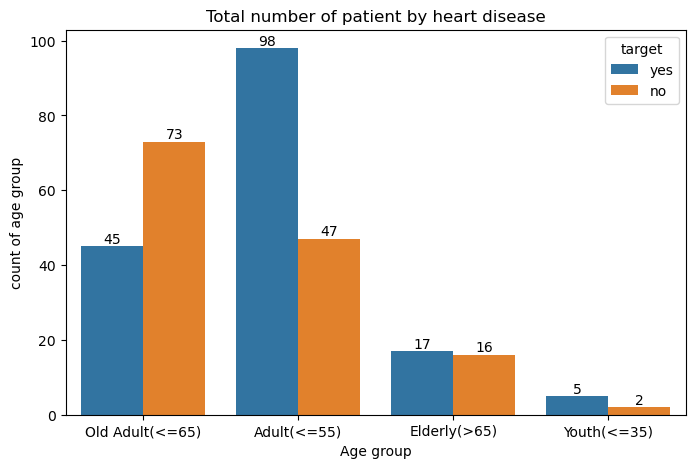

In [27]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x= "age_bracket", data=df, hue="target")
plt.xlabel("Age group")
plt.ylabel("count of age group")
ax.bar_label(container=ax.containers[0], label="count of age group")
ax.bar_label(container=ax.containers[1], label="count of age group")
plt.title("Total number of patient by heart disease");

#### Individuals between the ages of 36 to 55  are more prone to heart diseases. However, cases of heart disease

#### is lower among persons from the ages of 56years and above to 65 


### HEART DISEASE BY GENDER

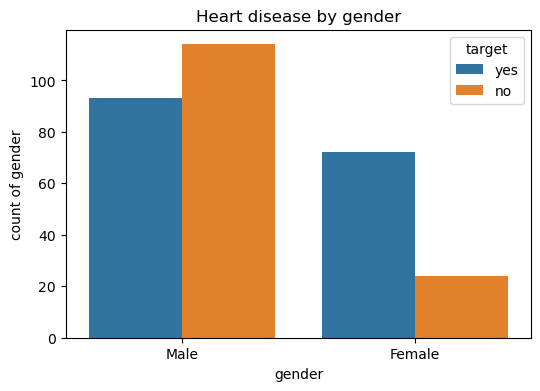

In [28]:
plt.figure(figsize=(6,4))
sns.countplot(x = "sex", data=df, hue= "target")
plt.xlabel("gender")
plt.ylabel("count of gender")
plt.title("Heart disease by gender");

#### Based on the proportion or categories of the male and famale as seen above;  females are more likely have heart disease.

In [29]:
df.columns

Index(['age', 'sex', 'Chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'Fasting_blood_sugar', 'restecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_of_major_vessels', 'thalassemai', 'target',
       'age_bracket'],
      dtype='object')

#### HEART DISEASE BY MAXIMUM HEART RATE ACHIEVED

In [30]:
df.head()

,age,sex,Chest_pain_type,resting_blood_pressure,cholesterol,Fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_of_major_vessels,thalassemai,target,age_bracket
0,63,Male,asymtomatic,145,233,1,Normal,150,no,2.3,upsloping,0,1,yes,Old Adult(<=65)
1,37,Male,non-anginal pain,130,250,0,ST abnormal,187,no,3.5,upsloping,0,2,yes,Adult(<=55)
2,41,Female,atypical angina,130,204,0,Normal,172,no,1.4,downsloping,0,2,yes,Adult(<=55)
3,56,Male,atypical angina,120,236,0,ST abnormal,178,no,0.8,downsloping,0,2,yes,Old Adult(<=65)
4,57,Female,typical angina,120,354,0,ST abnormal,163,yes,0.6,downsloping,0,2,yes,Old Adult(<=65)


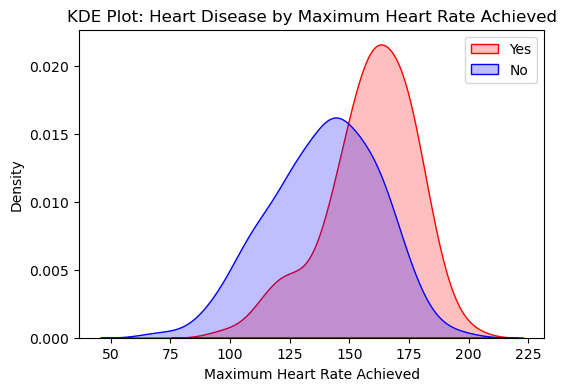

In [31]:
# KDE plot for 'maximum heart rate achieved' 

plt.figure(figsize=(6, 4))

# KDE plot for 'maximum heart rate achieved' with different colors for 'yes' and 'no'
sns.kdeplot(df.loc[df['target'] == 'yes', 'max_heart_rate_achieved'], color='red', fill=True, label='Yes')
sns.kdeplot(df.loc[df['target'] == 'no', 'max_heart_rate_achieved'], color='blue', fill=True, label='No')

plt.xlabel('Maximum Heart Rate Achieved')
plt.ylabel('Density')
plt.title('KDE Plot: Heart Disease by Maximum Heart Rate Achieved')
plt.legend()
plt.show()

#### HEART DISEASE BY CHEST PAIN TYPE 

#### to find out if a chest pain type is linked to heart disease

Text(0.5, 1.0, 'Heart disease by chest pain')

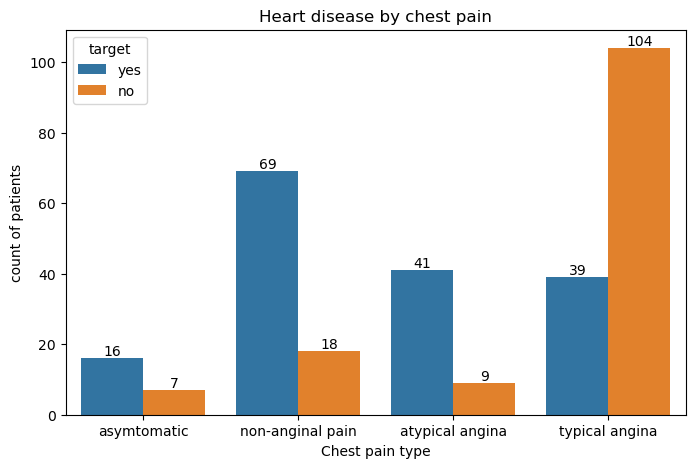

In [32]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x = "Chest_pain_type", data=df, hue="target")
plt.xlabel("Chest pain type")
plt.ylabel("count of patients")
ax.bar_label(container=ax.containers[0], label="count of patients")
ax.bar_label(container=ax.containers[1], label="count of patients")
plt.title("Heart disease by chest pain")

#### From the graph, Majority of the patients with Atypical angina and non-angina chest pain have heart disease. 


#### Implication: Patients with ATYPICAL ANGINA and NON-ANGINA  chest pain

#### are more likely to have  HEART DISEASE.

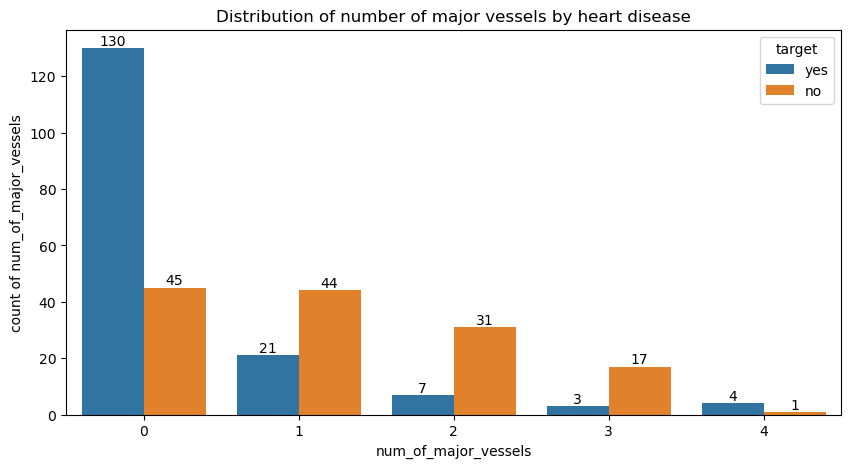

In [33]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x= 'num_of_major_vessels' , data=df, hue="target")
plt.xlabel('num_of_major_vessels')
plt.ylabel("count of num_of_major_vessels")
ax.bar_label(container=ax.containers[0], label="count of num_of_major_vessels")
ax.bar_label(container=ax.containers[1], label="count of num_of_major_vessels")
plt.title("Distribution of number of major vessels by heart disease");

In [34]:
df['thalassemai'].unique()

array([1, 2, 3], dtype=int64)

#### The graph above shows that patients with 4 major vessels are more likely to have heart disease, followed by patients with 0 major vessels.

In [35]:
def thal_category(th):
    if th==1:
        return 'fixed defect'
    elif th==2:
        return 'Normal'
    else:
        return 'Reversable defect'
df['thalassemai'] = df['thalassemai'].apply(thal_category)

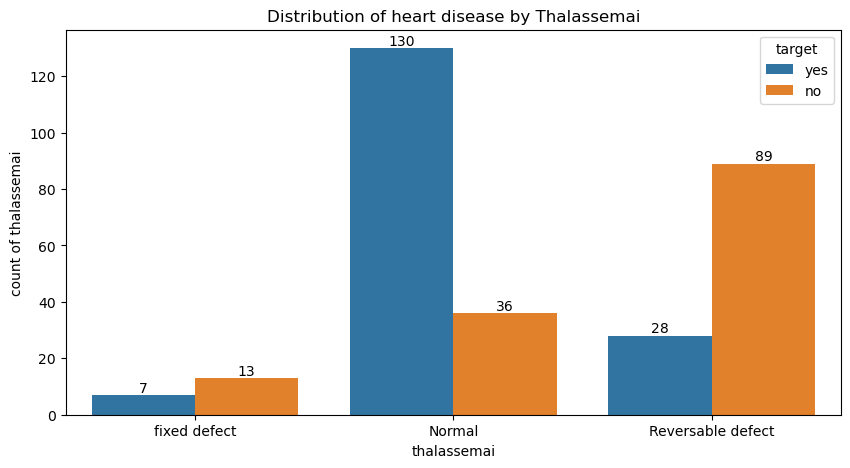

In [36]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x= 'thalassemai', data=df, hue="target")
plt.xlabel('thalassemai')
plt.ylabel("count of thalassemai")
ax.bar_label(container=ax.containers[0], label="count of age thalassemai")
ax.bar_label(container=ax.containers[1], label="count of age thalassemai")
plt.title("Distribution of heart disease by Thalassemai");

#### The chart above shows that people with the Normal thalassemai are more likely to have heart disease.

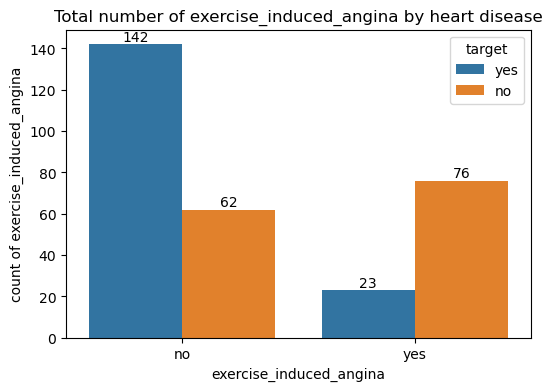

In [37]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x= 'exercise_induced_angina', data=df, hue="target")
plt.xlabel('exercise_induced_angina')
plt.ylabel("count of exercise_induced_angina")
ax.bar_label(container=ax.containers[0], label="count of exercise_induced_angina")
ax.bar_label(container=ax.containers[1], label="count of exercise_induced_angina")
plt.title("Total number of exercise_induced_angina by heart disease");

#### Patients who have no exercise induced angina are more likely to have heart disease

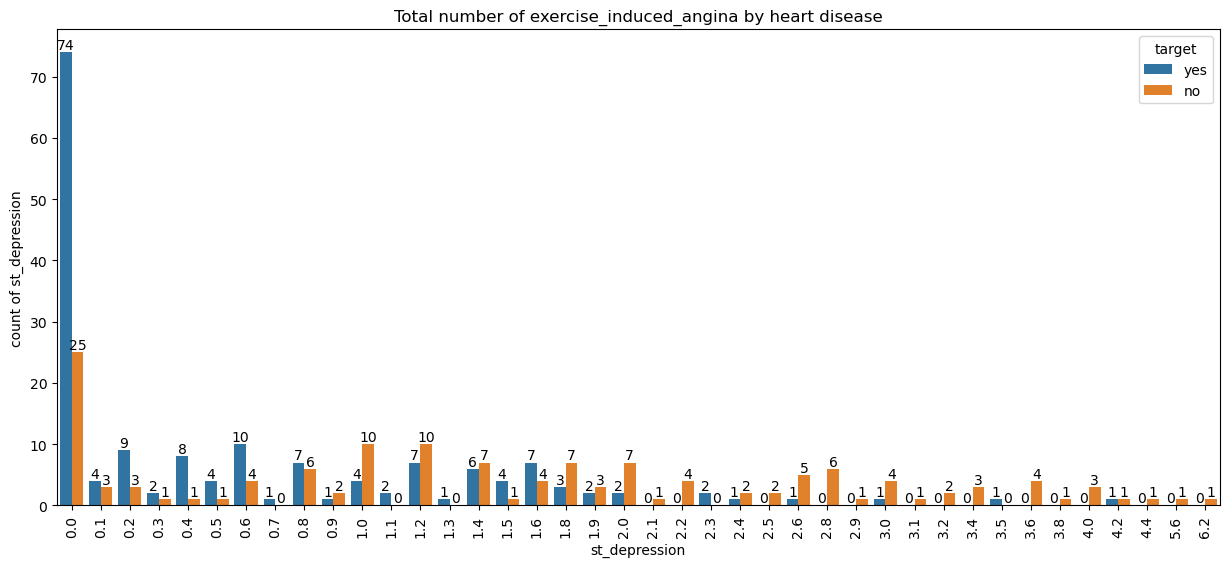

In [38]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x= 'st_depression', data=df, hue="target")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.subplots_adjust(bottom=0.2)
plt.xlabel('st_depression')
plt.ylabel("count of st_depression")
ax.bar_label(container=ax.containers[0], label="count of st_depression")
ax.bar_label(container=ax.containers[1], label="count of st_depression")
plt.title("Total number of exercise_induced_angina by heart disease");


#### Patients with st_depresion between 0.0 to 0.6 are most likely to have heart disease.

Text(0.5, 1.0, 'Total number of exercise_induced_angina by heart disease')

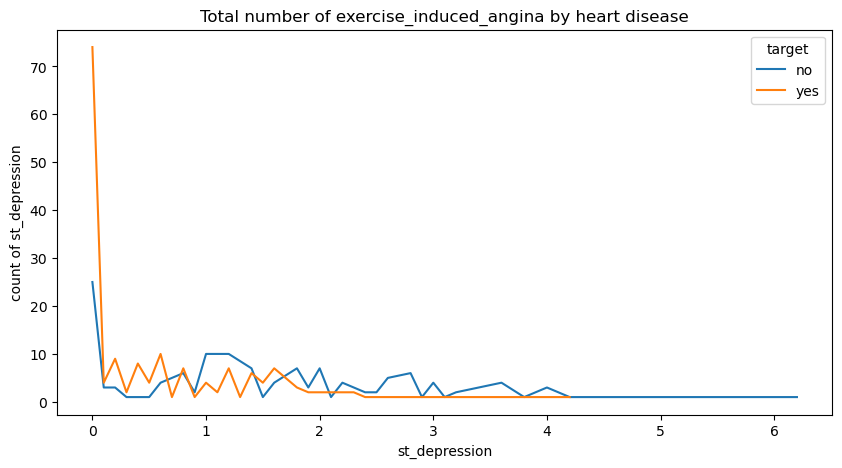

In [39]:
plt.figure(figsize=(10, 5))
ax = sns.lineplot(x='st_depression', y='count', hue='target',
                  data=df.groupby(['st_depression', 'target']).size().reset_index(name='count'))
plt.xlabel('st_depression')
plt.ylabel("count of st_depression")
plt.title("Total number of exercise_induced_angina by heart disease")



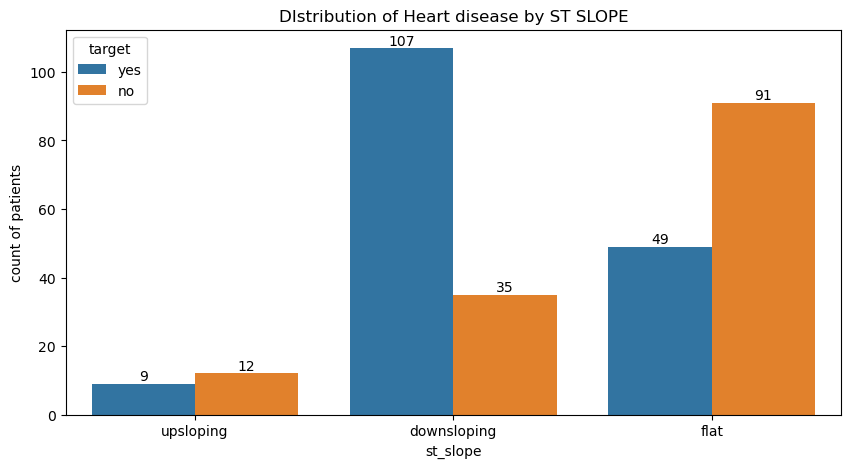

In [40]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x= 'st_slope', data=df, hue="target")
plt.xlabel('st_slope')
plt.ylabel("count of patients")
ax.bar_label(container=ax.containers[0], label="count of st_slope")
ax.bar_label(container=ax.containers[1], label="count of st_slope")
plt.title("DIstribution of Heart disease by ST SLOPE");

#### Patients with downsloping st_slope are more likely to have heart desease.

In [41]:
save_path = "C:/Users/HP/heart_disease_project/cleaned_dataset1.csv"

# Save the DataFrame to a CSV file
df.to_csv(save_path, index=False)

print(f'Data has been saved to {save_path}')

Data has been saved to C:/Users/HP/heart_disease_project/cleaned_dataset1.csv


In [42]:
df.head()

,age,sex,Chest_pain_type,resting_blood_pressure,cholesterol,Fasting_blood_sugar,restecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_of_major_vessels,thalassemai,target,age_bracket
0,63,Male,asymtomatic,145,233,1,Normal,150,no,2.3,upsloping,0,fixed defect,yes,Old Adult(<=65)
1,37,Male,non-anginal pain,130,250,0,ST abnormal,187,no,3.5,upsloping,0,Normal,yes,Adult(<=55)
2,41,Female,atypical angina,130,204,0,Normal,172,no,1.4,downsloping,0,Normal,yes,Adult(<=55)
3,56,Male,atypical angina,120,236,0,ST abnormal,178,no,0.8,downsloping,0,Normal,yes,Old Adult(<=65)
4,57,Female,typical angina,120,354,0,ST abnormal,163,yes,0.6,downsloping,0,Normal,yes,Old Adult(<=65)


In [43]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder


In [44]:
le_target = LabelEncoder()
df['target'] = le_target.fit_transform(df['target'])

#### Make a copy of the dataset (to save the encoded version while creating the encoded set)

In [45]:
df1 = df.copy()

In [46]:
df1 = pd.get_dummies(df1, dtype='int64')

df1.head()

,age,resting_blood_pressure,cholesterol,Fasting_blood_sugar,max_heart_rate_achieved,st_depression,num_of_major_vessels,target,sex_Female,sex_Male,...,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemai_Normal,thalassemai_Reversable defect,thalassemai_fixed defect,age_bracket_Adult(<=55),age_bracket_Elderly(>65),age_bracket_Old Adult(<=65),age_bracket_Youth(<=35)
0,63,145,233,1,150,2.3,0,1,0,1,...,0,0,1,0,0,1,0,0,1,0
1,37,130,250,0,187,3.5,0,1,0,1,...,0,0,1,1,0,0,1,0,0,0
2,41,130,204,0,172,1.4,0,1,1,0,...,1,0,0,1,0,0,1,0,0,0
3,56,120,236,0,178,0.8,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0
4,57,120,354,0,163,0.6,0,1,1,0,...,1,0,0,1,0,0,0,0,1,0


In [47]:

# Instanttiate the Scaler 

scaler = MinMaxScaler()


# fit the transformed data on the scaler

scaled_data = scaler.fit_transform (df1)

# the "scaled_data" will print as an array and we wont be able to see the header. To solve this, we convert the HEADER to a data frame

df1 = pd.DataFrame(scaled_data, columns=df1.columns)

df1  

,age,resting_blood_pressure,cholesterol,Fasting_blood_sugar,max_heart_rate_achieved,st_depression,num_of_major_vessels,target,sex_Female,sex_Male,...,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemai_Normal,thalassemai_Reversable defect,thalassemai_fixed defect,age_bracket_Adult(<=55),age_bracket_Elderly(>65),age_bracket_Old Adult(<=65),age_bracket_Youth(<=35)
0,0.708333,0.481132,0.244292,1.0,0.603053,0.370968,0.00,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.166667,0.339623,0.283105,0.0,0.885496,0.564516,0.00,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.250000,0.339623,0.178082,0.0,0.770992,0.225806,0.00,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.562500,0.245283,0.251142,0.0,0.816794,0.129032,0.00,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.0,0.702290,0.096774,0.00,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.433962,0.262557,0.0,0.396947,0.032258,0.00,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
299,0.333333,0.150943,0.315068,0.0,0.465649,0.193548,0.00,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
300,0.812500,0.471698,0.152968,1.0,0.534351,0.548387,0.50,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
301,0.583333,0.339623,0.011416,0.0,0.335878,0.193548,0.25,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


### MULTIVARIATE ANALYSIS

#### Since we want  to predict patients with heart disease, we first evaluate the variables that has a relationship with heart disease 
#### Using correlation (e.g sex, chest pain type, ST depression, etc)

### CORRELATION MATRIX

In [48]:
df1.columns

Index(['age', 'resting_blood_pressure', 'cholesterol', 'Fasting_blood_sugar',
       'max_heart_rate_achieved', 'st_depression', 'num_of_major_vessels',
       'target', 'sex_Female', 'sex_Male', 'Chest_pain_type_asymtomatic',
       'Chest_pain_type_atypical angina', 'Chest_pain_type_non-anginal pain',
       'Chest_pain_type_typical angina', 'restecg_Normal',
       'restecg_ST abnormal', 'restecg_non-aginal pain',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_downsloping', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemai_Normal', 'thalassemai_Reversable defect',
       'thalassemai_fixed defect', 'age_bracket_Adult(<=55)',
       'age_bracket_Elderly(>65)', 'age_bracket_Old Adult(<=65)',
       'age_bracket_Youth(<=35)'],
      dtype='object')

In [49]:
from IPython.display import display, Javascript
display(Javascript('IPython.OutputArea.prototype._should_scroll = function(lines) { return false; }'))

<IPython.core.display.Javascript object>

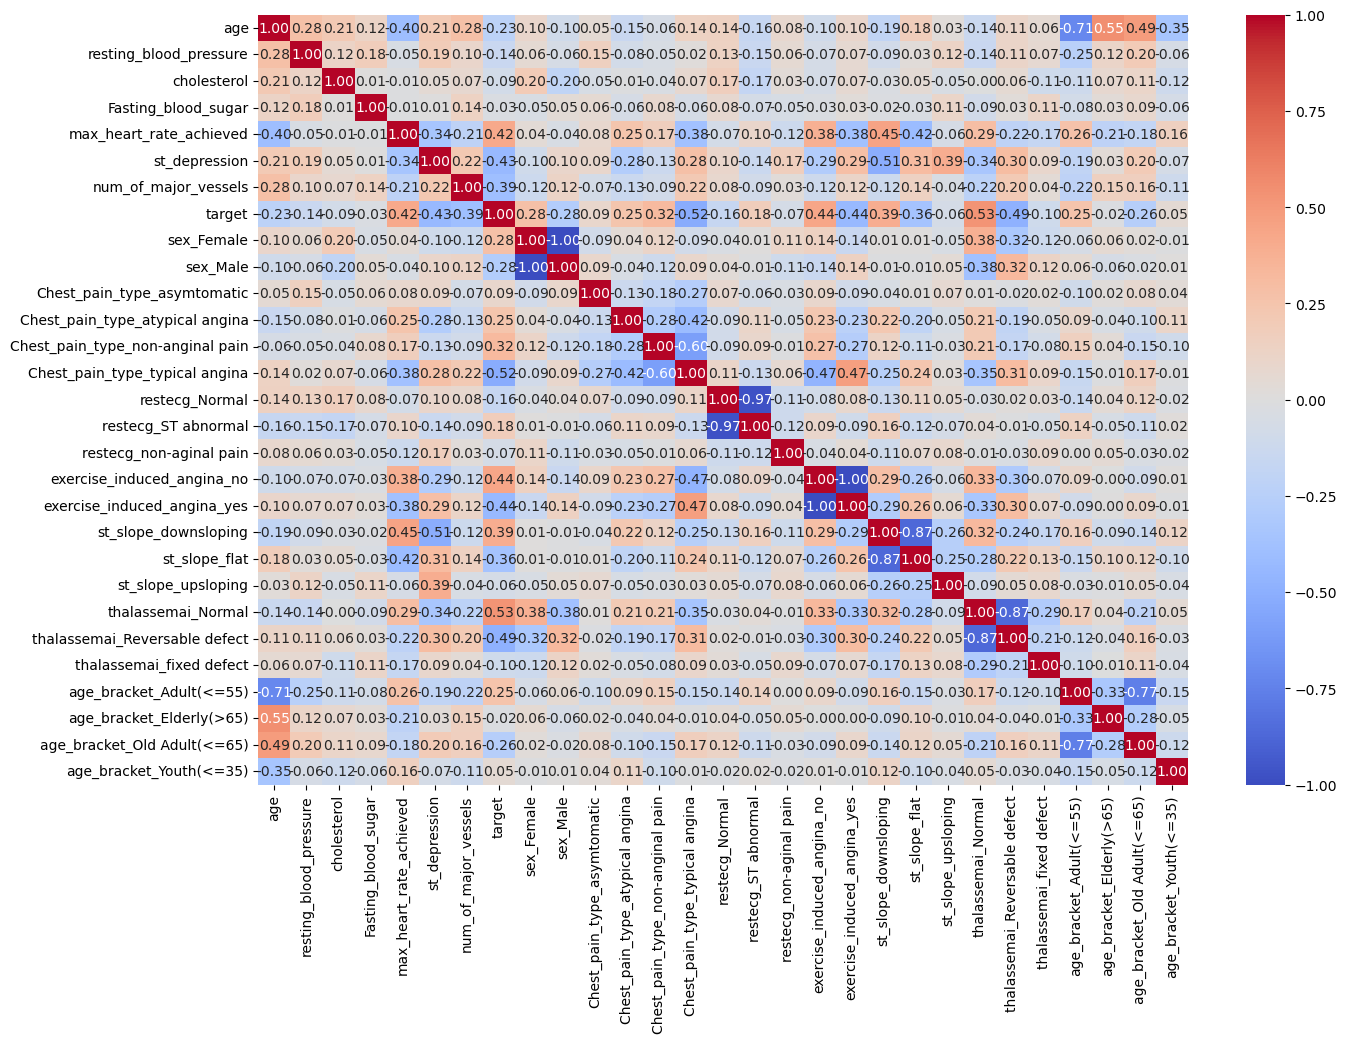

In [50]:
# Correlation between target(disease) and other variables in the dataset.

plt.figure(figsize=(15,10))
hm = sns.heatmap(df1.corr(), cbar=True, annot=True, cmap ='coolwarm',fmt='.2f', 
                 annot_kws={'size':10})

#### Strong relationship is from 0.5 to 1 and -0.5 to -1

In [51]:
# To Visualise the correlation of TARGET against other variables

df1.corr()[['target']]

,target
age,-0.225439
resting_blood_pressure,-0.144931
cholesterol,-0.085239
Fasting_blood_sugar,-0.028046
max_heart_rate_achieved,0.421741
st_depression,-0.430696
num_of_major_vessels,-0.391724
target,1.000000
sex_Female,0.280937
sex_Male,-0.280937


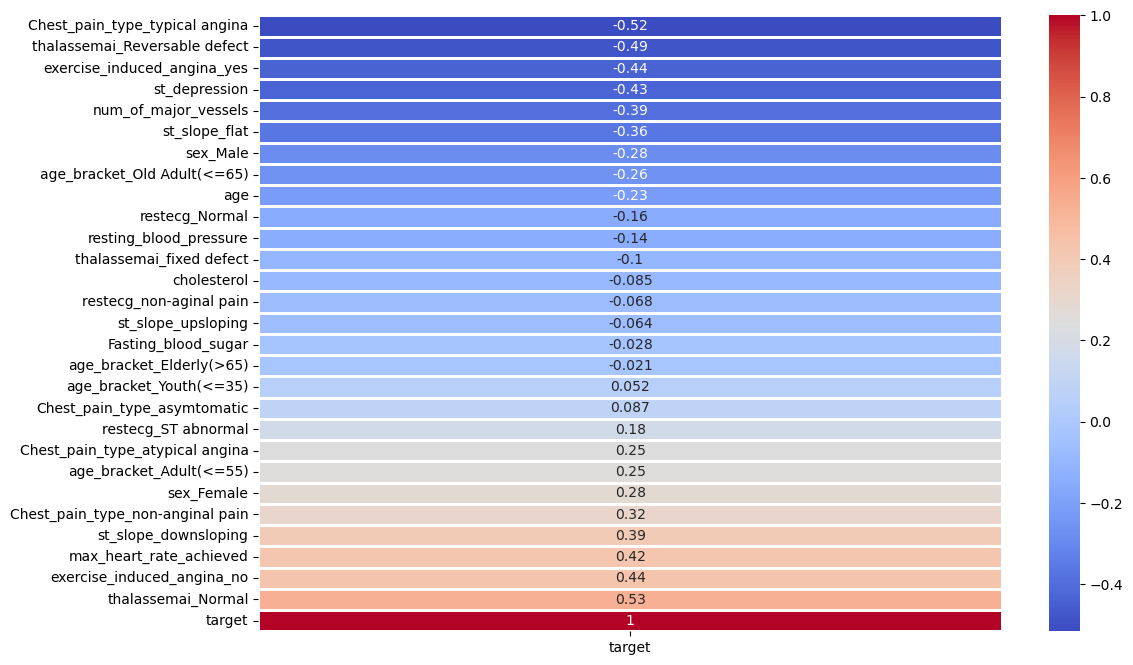

In [52]:
plt.figure(figsize=(12,8))

sns.heatmap(df1.corr()[['target']].sort_values(by='target'), linewidths=1, annot=True,cmap='coolwarm');

### FEATURE ENGINEERING / DATA PRE-PROCESSING

In [53]:
df.columns

Index(['age', 'sex', 'Chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'Fasting_blood_sugar', 'restecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_of_major_vessels', 'thalassemai', 'target',
       'age_bracket'],
      dtype='object')

In [54]:
# Feature selection ( dropping columns with less significance)

df.drop(['age', 'resting_blood_pressure', 'cholesterol', 'Fasting_blood_sugar', 'restecg', 
               'age_bracket'], axis =1, inplace =True)


In [55]:
df.columns

Index(['sex', 'Chest_pain_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_of_major_vessels', 'thalassemai', 'target'],
      dtype='object')

In [56]:
df.head()

,sex,Chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_of_major_vessels,thalassemai,target
0,Male,asymtomatic,150,no,2.3,upsloping,0,fixed defect,1
1,Male,non-anginal pain,187,no,3.5,upsloping,0,Normal,1
2,Female,atypical angina,172,no,1.4,downsloping,0,Normal,1
3,Male,atypical angina,178,no,0.8,downsloping,0,Normal,1
4,Female,typical angina,163,yes,0.6,downsloping,0,Normal,1


In [57]:
save_path = "C:/Users/HP/heart_disease_project/cleaned_dataset2.csv"

# Save the DataFrame to a CSV file
df.to_csv(save_path, index=False)

print(f'Data has been saved to {save_path}')

Data has been saved to C:/Users/HP/heart_disease_project/cleaned_dataset2.csv


In [58]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [59]:
logreg = LogisticRegression()

ohe = OneHotEncoder()

In [60]:
df1.columns

Index(['age', 'resting_blood_pressure', 'cholesterol', 'Fasting_blood_sugar',
       'max_heart_rate_achieved', 'st_depression', 'num_of_major_vessels',
       'target', 'sex_Female', 'sex_Male', 'Chest_pain_type_asymtomatic',
       'Chest_pain_type_atypical angina', 'Chest_pain_type_non-anginal pain',
       'Chest_pain_type_typical angina', 'restecg_Normal',
       'restecg_ST abnormal', 'restecg_non-aginal pain',
       'exercise_induced_angina_no', 'exercise_induced_angina_yes',
       'st_slope_downsloping', 'st_slope_flat', 'st_slope_upsloping',
       'thalassemai_Normal', 'thalassemai_Reversable defect',
       'thalassemai_fixed defect', 'age_bracket_Adult(<=55)',
       'age_bracket_Elderly(>65)', 'age_bracket_Old Adult(<=65)',
       'age_bracket_Youth(<=35)'],
      dtype='object')

In [61]:
X = df.drop('target', axis='columns')

Y = df.target

In [62]:
column_trans = make_column_transformer((OneHotEncoder(),
                ['sex', 'Chest_pain_type', 'exercise_induced_angina', 
                 'st_slope', 'thalassemai']), remainder='passthrough')


In [63]:
df_encoded= column_trans.fit_transform(X)

In [64]:
df_encoded 

array([[  0. ,   1. ,   1. , ..., 150. ,   2.3,   0. ],
       [  0. ,   1. ,   0. , ..., 187. ,   3.5,   0. ],
       [  1. ,   0. ,   0. , ..., 172. ,   1.4,   0. ],
       ...,
       [  0. ,   1. ,   0. , ..., 141. ,   3.4,   2. ],
       [  0. ,   1. ,   0. , ..., 115. ,   1.2,   1. ],
       [  1. ,   0. ,   0. , ..., 174. ,   0. ,   1. ]])

In [65]:
# Get the column names after one-hot encoding

encoded_columns = column_trans.named_transformers_['onehotencoder'] \
    .get_feature_names_out(['sex', 'Chest_pain_type', 'exercise_induced_angina', 'st_slope', 'thalassemai'])


In [66]:
# Create the DataFrame with the encoded columns
df_encoded = pd.DataFrame(df_encoded, columns=list(encoded_columns) 
                            + list(X.columns.drop(['sex', 'Chest_pain_type', 
                                                                                            
                            'exercise_induced_angina', 'st_slope', 'thalassemai'])))

In [67]:
df_encoded

,sex_Female,sex_Male,Chest_pain_type_asymtomatic,Chest_pain_type_atypical angina,Chest_pain_type_non-anginal pain,Chest_pain_type_typical angina,exercise_induced_angina_no,exercise_induced_angina_yes,st_slope_downsloping,st_slope_flat,st_slope_upsloping,thalassemai_Normal,thalassemai_Reversable defect,thalassemai_fixed defect,max_heart_rate_achieved,st_depression,num_of_major_vessels
0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,150.0,2.3,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,187.0,3.5,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,172.0,1.4,0.0
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,178.0,0.8,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,163.0,0.6,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,123.0,0.2,0.0
299,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,132.0,1.2,0.0
300,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,141.0,3.4,2.0
301,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,115.0,1.2,1.0


In [68]:
pipe = make_pipeline(column_trans, logreg)

In [69]:
cross_val_score(pipe, X, Y, cv=5, scoring='accuracy').mean()

0.8349180327868853

In [70]:
pipe.fit(X, Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'Chest_pain_type',
                                                   'exercise_induced_angina',
                                                   'st_slope',
                                                   'thalassemai'])])),
                ('logisticregression', LogisticRegression())])

In [71]:
pipe.predict(X)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

### Saving the Model ( Logistic Regression)

In [72]:
import pickle


In [73]:
data = {'model': pipe}
with open ('pipe_hrtmod_.pkl', 'wb') as file:
    pickle.dump(data, file)

### Testing new data

##### Loading the model


In [74]:
with open ('pipe_hrtmod_.pkl', 'rb') as file:
    data = pickle.load(file)



In [75]:

user_input = {'sex': 'Male', 'Chest_pain_type': 'asymtomatic', 'max_heart_rate_achieved': 20, 'exercise_induced_angina': 
              'no',
             'st_depression': 2.3, 'st_slope': 'upsloping', 'num_of_major_vessels': 4, 'thalassemai': 'fixed defect'}

user_df = pd.DataFrame([user_input])

In [76]:
user_df

,sex,Chest_pain_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_of_major_vessels,thalassemai
0,Male,asymtomatic,20,no,2.3,upsloping,4,fixed defect


In [77]:
pipe.fit(X,Y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['sex', 'Chest_pain_type',
                                                   'exercise_induced_angina',
                                                   'st_slope',
                                                   'thalassemai'])])),
                ('logisticregression', LogisticRegression())])

In [78]:

# Make predictions and obtain probabilities
heart_disease_proba = pipe.predict_proba(user_df)[:, 1]  # Assuming you want the probability of the positive class

# Make a decision based on a threshold (adjust the threshold as needed)
threshold = 0.5
heart_disease = 1 if heart_disease_proba > threshold else 0

# Output results
if heart_disease == 1:
    print(f'This patient has heart disease with a probability of {heart_disease_proba[0]*100:.2f}%')
else:
    print(f'This patient does not have heart disease with a probability of {(1 - heart_disease_proba[0])*100:.2f}%')

This patient does not have heart disease with a probability of 97.28%
